In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio
import torch

import os,sys,inspect
sys.path.insert(0, "..") 
from src.data import podcast
from src.dataprocessing import utils, utils_librosa

/home/jorge/anaconda3/envs/speechgen/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/jorge/anaconda3/envs/speechgen/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
podcast = podcast.PODCAST(root="../data/Podcast", audio_folder="corpus", text_file="metadata_TCC.csv")
dataloader_podcast = torch.utils.data.DataLoader(podcast)
dataiter_podcast = iter(dataloader_podcast)

In [3]:
waveform1, sample_rate1, text1, season_id1, episode_id1, utterance_id1 = dataiter_podcast.next()
waveform2, sample_rate2, text2, season_id2, episode_id1, utterance_id2 = dataiter_podcast.next()

Waveform 0, shape: torch.Size([1, 1, 89061])
Waveform 0, Sample rate: tensor([22050])


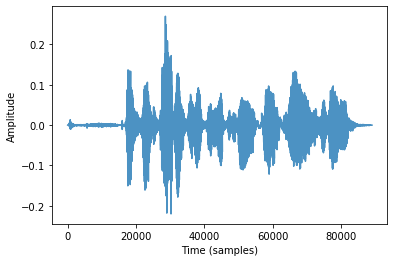

In [4]:
utils.plot_wave([waveform1], sample_rate1)

Waveform 0, shape: torch.Size([1, 1, 89061])
Waveform 0, Sample rate: tensor([22050])


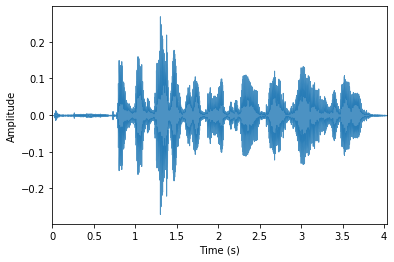

In [5]:
utils_librosa.plot_wave([waveform1], sample_rate1)

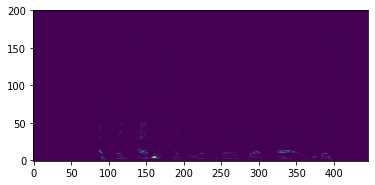

In [6]:
spectrogram = utils.wave_to_spectrogram(waveform1[0][0])
utils.plot_spectrogram(spectrogram)

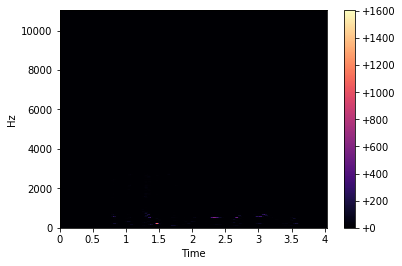

In [7]:
import librosa.display
spectrogram_librosa1 = utils_librosa.wave_to_spectrogram(waveform1[0][0])
utils_librosa.plot_spectrogram(spectrogram_librosa1, sample_rate1)

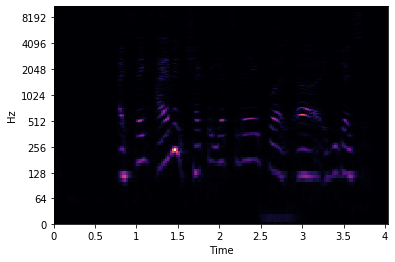

In [8]:
import librosa
import numpy as np
#Using y_axis = log
librosa.display.specshow(np.abs(librosa.stft(waveform1[0][0].numpy())), sr=sample_rate1, x_axis='time', y_axis='log')

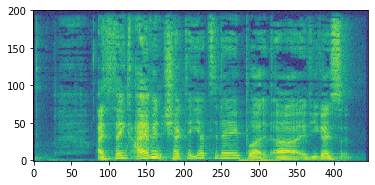

In [9]:
spectrogram = utils.wave_to_spectrogram(waveform1[0][0])
spectrogram_db = utils.amplitude_to_db(spectrogram, stype='power')
utils.plot_spectrogram(spectrogram_db)

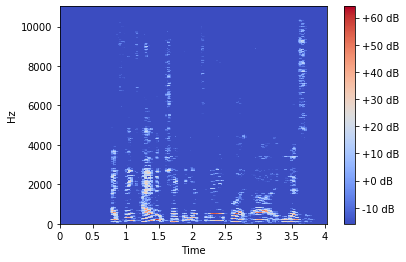

In [10]:
spectrogram_librosa = utils_librosa.wave_to_spectrogram(waveform1[0][0])
spectrogram_librosa_db = utils_librosa.amplitude_to_db(spectrogram_librosa, stype=None)
utils_librosa.plot_spectrogram(spectrogram_librosa_db, sample_rate1, in_dB=True)

In [11]:
spectrogram_db.shape, spectrogram_librosa_db.shape

(torch.Size([201, 446]), torch.Size([1025, 174]))

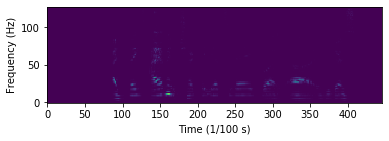

In [12]:
melspectrogram = utils.wave_to_melspectrogram(waveform1[0][0], sample_rate1.item())
utils.plot_melspectrogram(melspectrogram)

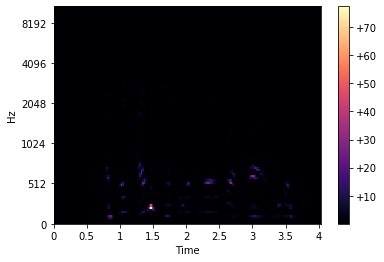

In [14]:
melspectrogram_librosa = utils_librosa.wave_to_melspectrogram(waveform1[0][0], sample_rate1.item())
utils_librosa.plot_melspectrogram(melspectrogram_librosa, sample_rate1.item())

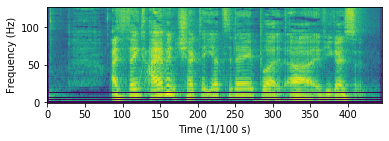

In [15]:
melspectrogram = utils.wave_to_melspectrogram(waveform1[0][0], sample_rate1.item())
melspectrogram_db = utils.amplitude_to_db(melspectrogram, stype='power')
utils.plot_melspectrogram(melspectrogram_db)

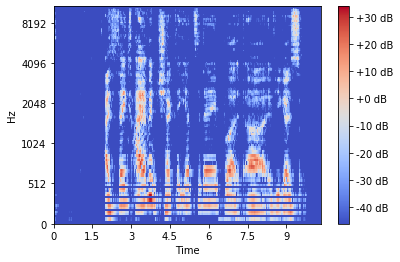

In [30]:
melspectrogram_librosa = utils_librosa.wave_to_melspectrogram(waveform1[0][0], sample_rate1.item())
melspectrogram_librosa_db = utils_librosa.amplitude_to_db(melspectrogram, stype=None)
utils_librosa.plot_melspectrogram(melspectrogram_librosa_db, sample_rate1.item(), in_dB=True)

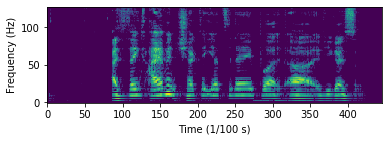

In [22]:
melspectrogram_librosa = utils_librosa.wave_to_melspectrogram(waveform1[0][0], sample_rate1.item())
melspectrogram_librosa_db = utils_librosa.amplitude_to_db(melspectrogram, stype=None)
utils.plot_melspectrogram(melspectrogram_librosa_db)

In [19]:
melspectrogram_db.shape, melspectrogram_librosa_db.shape

(torch.Size([128, 446]), torch.Size([128, 446]))

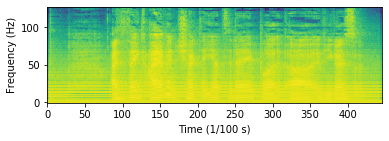

In [39]:
import torchaudio
# waveform -> linear spectrogram -> amplitude to db -> mel spectrogram
spectrogram = utils.wave_to_spectrogram(waveform1[0][0])
spectrogram_db = utils.amplitude_to_db(spectrogram,'power')
melspectrogram = torchaudio.transforms.MelScale()(spectrogram_db)
utils.plot_melspectrogram(melspectrogram)

In [ ]:
spectrogram_librosa = utils_librosa.wave_to_spectrogram(waveform1[0][0])
spectrogram_librosa_db = utils_librosa.amplitude_to_db(spectrogram_librosa, stype=None)
melspectrogram_librosa = 